 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [25]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [26]:
# Count nulls
# YOUR CODE HERE
whale_df.columns[whale_df.isnull().any()]
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [27]:
# Drop nulls
# YOUR CODE HERE
whale_df.columns[whale_df.dropna(inplace=True)]
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [28]:
# Reading algorithmic returns
algo_returns= Path("algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [29]:
# Count nulls
# YOUR CODE HERE
algo_df.columns[algo_df.isnull().any()]
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [30]:
# Drop nulls
# YOUR CODE HERE
algo_df.columns[algo_df.dropna(inplace=True)]
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [31]:
# Reading S&P 500 Closing Prices
sp500_history = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [32]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [33]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [34]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [35]:
# Fix Data Types
# YOUR CODE HERE
## Converting `order_total` from `object` to `float`
## Class code: csv_data['order_total'] = csv_data['order_total'].astype('float')
#sp500_df(["Close"]).convert_objects(convert_numeric=True)
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [36]:
algo_df = algo_df.sort_index(ascending = False)
whale_df = whale_df.sort_index(ascending = False)
sp500_df = sp500_df.sort_index(ascending = False)

In [37]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [38]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [40]:
# Rename Column 
# YOUR CODE HERE
sp500_df.rename(columns = {'Close':'S&P500'}, inplace = True)
sp500_df.head()

,S&P500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [41]:
sp500_df = sp500_df.pct_change()
sp500_df

,S&P500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [42]:
sp500_df.dropna(inplace=True)
sp500_df.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [43]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")

In [44]:
# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace= True)

In [45]:
# Set column names
combined_df.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'ALGO1', 'ALGO2', 'SP500']

In [46]:
# Display a few rows
combined_df.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

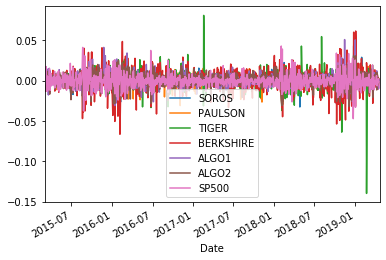

In [49]:
# Plot daily returns
# YOUR CODE HERE
daily_returns = combined_df.plot()

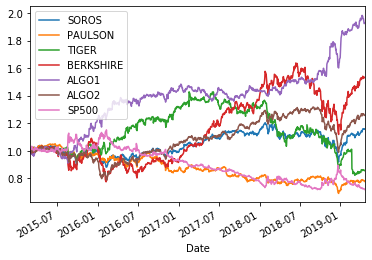

In [50]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

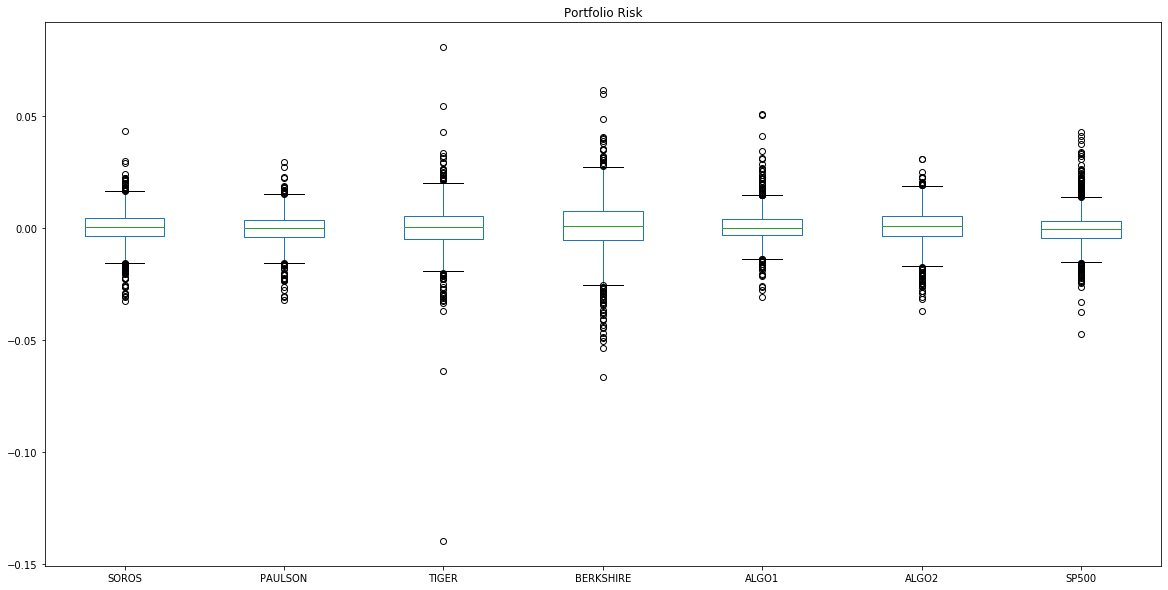

In [55]:
#Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [59]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
standard_deviation = combined_df.std()
standard_deviation

SOROS        0.007896
PAULSON      0.007026
TIGER        0.010897
BERKSHIRE    0.012919
ALGO1        0.007623
ALGO2        0.008341
SP500        0.008587
dtype: float64

In [61]:
 # Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier = standard_deviation[standard_deviation > standard_deviation["SP500"]]
print(riskier) 

TIGER        0.010897
BERKSHIRE    0.012919
dtype: float64


In [62]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_deviation = combined_df.std() * np.sqrt(252)
annualized_deviation

SOROS        0.125348
PAULSON      0.111527
TIGER        0.172989
BERKSHIRE    0.205079
ALGO1        0.121006
ALGO2        0.132413
SP500        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

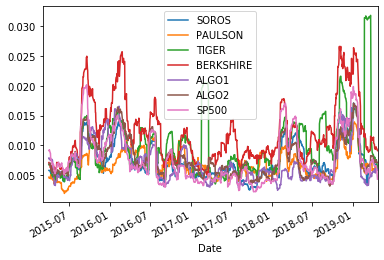

In [63]:
combined_df.rolling(window=21).std().plot()

In [64]:
# Correlation
# YOUR CODE HERE
price_correlation = combined_df.corr()
price_correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500
SOROS,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
ALGO1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
ALGO2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [65]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_df['BERKSHIRE'].cov(combined_df['SP500'])
covariance

-1.5371091324717573e-06

In [66]:
variance = combined_df['SP500'].var()
variance

7.373467552840441e-05

In [67]:
soros_beta = covariance / variance
soros_beta

-0.020846489408902668

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [35]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [68]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS        0.342894
PAULSON     -0.491422
TIGER       -0.130186
BERKSHIRE    0.606743
ALGO1        1.369589
ALGO2        0.484334
SP500       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

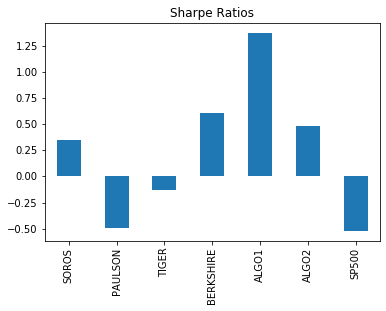

In [69]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Read the first stock
# YOUR CODE HERE
goog_historical_csv = Path("goog_historical.csv")
goog_historical_df = pd.read_csv(goog_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [71]:
# Read the second stock
# YOUR CODE HERE
cost_historical_csv = Path("cost_historical.csv")
cost_historical_df = pd.read_csv(cost_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [72]:
# Read the third stock
# YOUR CODE HERE
aapl_historical_csv = Path("aapl_historical.csv")
aapl_historical_df = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [73]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
new_combined_df = pd.concat([goog_historical_df, cost_historical_df, aapl_historical_df], axis="columns", join="inner")
new_combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,COST,243.47,AAPL,200.72
2019-05-08,GOOG,1166.27,COST,241.34,AAPL,202.90
2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86
2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75


In [74]:
new_combined_df.drop(columns = ['Symbol'], inplace = True)
new_combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75


In [75]:
new_combined_df.columns = ['GOOG', 'COST', 'AAPL']
new_combined_df.head()

,GOOG,COST,AAPL
Trade DATE,,,
2019-05-09,1162.38,243.47,200.72
2019-05-08,1166.27,241.34,202.90
2019-05-07,1174.10,240.18,202.86
2019-05-06,1189.39,244.23,208.48
2019-05-03,1185.40,244.62,211.75


In [76]:
# Reset the index
# YOUR CODE HERE
new_combined_df.sort_index(inplace= True)
new_combined_df.head()

,GOOG,COST,AAPL
Trade DATE,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99


In [77]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
# Done above
new_combined_df = new_combined_df.pivot_table(index="Trade DATE")
new_combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [78]:
# Drop Nulls
# YOUR CODE HERE
new_combined_df.dropna(inplace=True)
new_combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [79]:
all_returns = new_combined_df.pct_change()
all_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [80]:
all_returns.dropna(inplace=True)
all_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [81]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = new_combined_df.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11    494.203333
2018-05-14    494.743333
2018-05-15    487.050000
2018-05-16    489.553333
2018-05-17    488.393333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [82]:
# YOUR CODE HERE
master_combined_df = pd.concat([combined_df, new_combined_df], axis="columns", join="inner")
master_combined_df.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,188.59,195.76,1098.26
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,188.15,195.88,1100.20
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,186.44,195.48,1079.23
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,188.18,198.71,1081.77
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,186.99,199.60,1078.59


In [84]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
master_combined_df.dropna(inplace=True)
print(master_combined_df.tail())

               SOROS   PAULSON     TIGER  BERKSHIRE     ALGO1     ALGO2  \
2019-04-15 -0.001422 -0.001156  0.000398  -0.010492 -0.004331 -0.004572   
2019-04-16  0.002699  0.000388 -0.000831   0.000837 -0.006945  0.002899   
2019-04-17 -0.002897 -0.006467 -0.004409   0.003222 -0.010301 -0.005228   
2019-04-18  0.001448  0.001222  0.000582   0.001916 -0.000588 -0.001229   
2019-04-22 -0.002586 -0.007333 -0.003640  -0.001088  0.000677 -0.001936   

               SP500    AAPL    COST     GOOG  
2019-04-15 -0.000509  199.23  246.33  1221.10  
2019-04-16  0.002279  199.25  245.34  1227.13  
2019-04-17 -0.001577  203.13  245.56  1236.34  
2019-04-18 -0.001011  203.86  245.81  1236.37  
2019-04-22 -0.008764  204.53  243.42  1248.84  


In [85]:
master_combined_df.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,188.59,195.76,1098.26
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,188.15,195.88,1100.20
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,186.44,195.48,1079.23
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,188.18,198.71,1081.77
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,186.99,199.60,1078.59


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [87]:
# Risk
# YOUR CODE HERE
new_risk = master_combined_df.std()
print(new_risk.sort_values())

PAULSON       0.007350
ALGO1         0.008419
ALGO2         0.008769
SOROS         0.009234
SP500         0.009584
TIGER         0.014642
BERKSHIRE     0.015548
COST         13.855557
AAPL         21.740033
GOOG         66.486356
dtype: float64


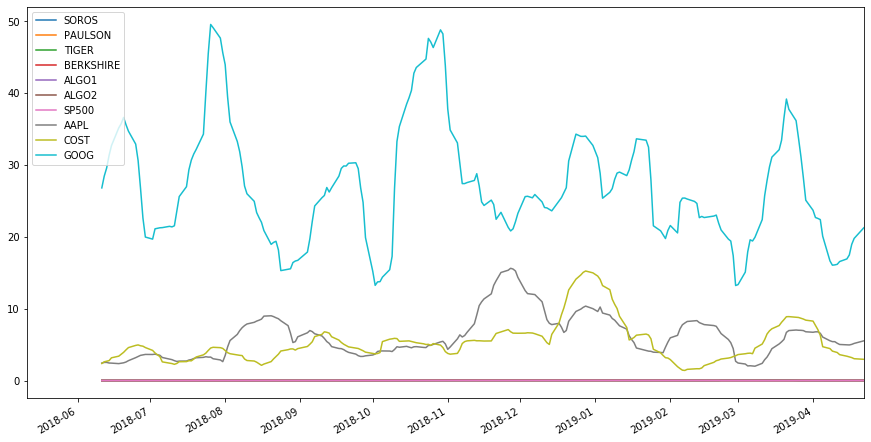

In [92]:
# Rolling
# YOUR CODE HERE
master_combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [94]:
# Beta
# YOUR CODE HERE
corr = master_combined_df.corr()
daily_returns = master_combined_df.pct_change()

print(corr)

              SOROS   PAULSON     TIGER  BERKSHIRE     ALGO1     ALGO2  \
SOROS      1.000000  0.791031  0.476938   0.816190  0.336890  0.861989   
PAULSON    0.791031  1.000000  0.484917   0.650132  0.360668  0.783856   
TIGER      0.476938  0.484917  1.000000   0.323931  0.113568  0.408381   
BERKSHIRE  0.816190  0.650132  0.323931   1.000000  0.326025  0.781894   
ALGO1      0.336890  0.360668  0.113568   0.326025  1.000000  0.364440   
ALGO2      0.861989  0.783856  0.408381   0.781894  0.364440  1.000000   
SP500     -0.028091 -0.059893  0.005812  -0.038751 -0.054454 -0.042549   
AAPL      -0.050062  0.005247  0.025867  -0.086590 -0.009648 -0.077637   
COST       0.029908  0.006184  0.032799  -0.002391  0.028899 -0.004001   
GOOG       0.116906  0.136350  0.093394   0.060483 -0.075254  0.135601   

              SP500      AAPL      COST      GOOG  
SOROS     -0.028091 -0.050062  0.029908  0.116906  
PAULSON   -0.059893  0.005247  0.006184  0.136350  
TIGER      0.005812  0.025867

In [51]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [95]:
sharpe_ratios = (master_combined_df.mean() * 252) / (master_combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS          0.344766
PAULSON        0.236041
TIGER         -1.052249
BERKSHIRE      0.085005
ALGO1          1.999866
ALGO2          0.009467
SP500         -0.432942
AAPL         139.440063
COST         253.103446
GOOG         270.571954
dtype: float64

In [96]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

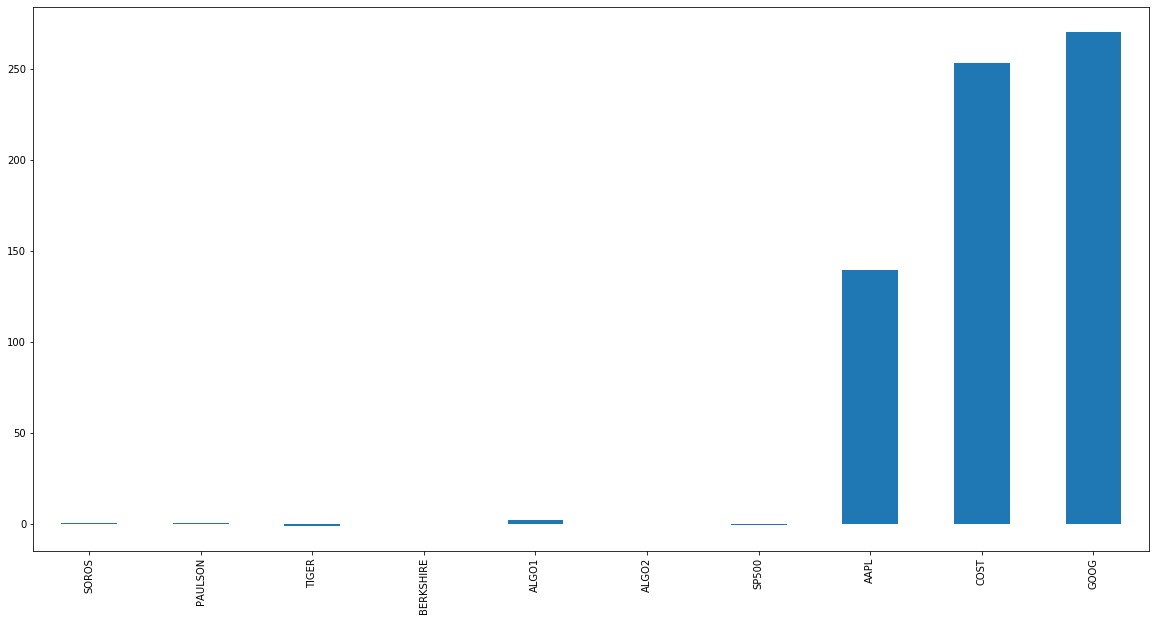

In [97]:
sharpe_ratios.plot(kind='bar', figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [98]:
# YOUR CODE HERE

In [100]:
master_corr = master_combined_df.corr()
master_corr

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500,AAPL,COST,GOOG
SOROS,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,-0.050062,0.029908,0.116906
PAULSON,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.005247,0.006184,0.136350
TIGER,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.025867,0.032799,0.093394
BERKSHIRE,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,-0.086590,-0.002391,0.060483
ALGO1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,-0.009648,0.028899,-0.075254
ALGO2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,-0.077637,-0.004001,0.135601
SP500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.119074,0.054865,0.017112
AAPL,-0.050062,0.005247,0.025867,-0.086590,-0.009648,-0.077637,0.119074,1.000000,0.564346,0.536807
COST,0.029908,0.006184,0.032799,-0.002391,0.028899,-0.004001,0.054865,0.564346,1.000000,0.482371
GOOG,0.116906,0.136350,0.093394,0.060483,-0.075254,0.135601,0.017112,0.536807,0.482371,1.000000
